## Mask R-CNN - Inspect Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [44]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from mask_rcnn import utils, visualize
from mask_rcnn import model as modellib
from mask_rcnn.visualize import display_images, random_colors
from mask_rcnn.model import log
from core.mask_rcnn_config import IMAGE_WIDTH

print(IMAGE_WIDTH)

%matplotlib inline 
%load_ext autoreload
%autoreload 2

# Root directory of the project
ROOT_DIR = os.getcwd()

# Path to Shapes trained weights
# WEIGHTS_PATH = os.path.join(ROOT_DIR, "model", "mask_rcnn_osm_0232.h5")
WEIGHTS_PATH = r"D:\_models\stage2_hombi_rappi_zh.h5"
assert os.path.isfile(WEIGHTS_PATH)
print("Done")

256
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


## Configurations

In [2]:
from core.mask_rcnn_config import MyMaskRcnnConfig

config = MyMaskRcnnConfig()

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
#     RPN_ANCHOR_SCALES = (4,8,16, 32, 64)
#     BACKBONE_STRIDES = [1,2,4, 8, 16]
    IMAGE_MIN_DIM = IMAGE_WIDTH
    IMAGE_MAX_DIM = IMAGE_WIDTH
    #USE_RPN_ROIS = False
#     RPN_ANCHOR_STRIDE = 2
#     RPN_NMS_THRESHOLD = 0.1


config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [63.1 81.3 83.1]
MINI_MASK_SHAPE                (56, 56)
NAME                           osm
NUM_CLASSES                    6
POOL_SIZE                      7
POST_NMS_ROIS_

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [18]:
from core.mask_rcnn_config import OsmMappingDataset
import glob

TRAINING_DATA_DIR = r"D:\training_images\_new\wettingen\**\*.tiff"
# TRAINING_DATA_DIR = r"/home/martin/dev/_images"
# TRAINING_DATA_DIR = r"D:\training_images\zurich_hires_test"
# TRAINING_DATA_DIR = r"C:\Temp\images\training\256_overfitting"
# TRAINING_DATA_DIR = r"C:\DEV\osm-instance-segmentation\test\data"
# path = os.path.join(TRAINING_DATA_DIR, "**/capetown.bmp")
# path = os.path.join(TRAINING_DATA_DIR, "**/*.tiff")
# path = os.path.join(TRAINING_DATA_DIR, r"some_other_city\23128930_15_1_2.tiff")


print(TRAINING_DATA_DIR)
images = glob.glob(TRAINING_DATA_DIR, recursive=True)

# print(images)
random.shuffle(images)

cutoffIndex = int(len(images)*1)
validationImages = images[cutoffIndex:-1]
validationImages = images

# Validation dataset
dataset = OsmMappingDataset(validationImages)
dataset.load()
dataset.prepare()


print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

D:\training_images\_new\wettingen\**\*.tiff
Dataset: OsmMappingDataset

Loading 835 images...
Loaded.
Images: 835
Classes: ['BG', 'building', 'vineyard', 'highway', 'pool', 'tennis']


## Load Model

In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", 
                              model_dir=os.path.join(ROOT_DIR, "model"),
                              config=config)

# Load weights
print("Loading weights ", WEIGHTS_PATH)
model.load_weights(WEIGHTS_PATH, by_name=True)
print("Done")

Loading weights  D:\_models\stage2_hombi_rappi_zh.h5
Done


## Run Detection

191


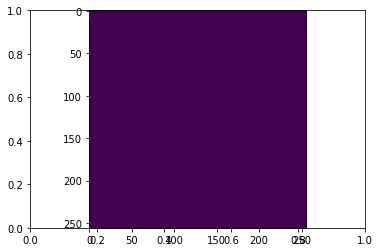

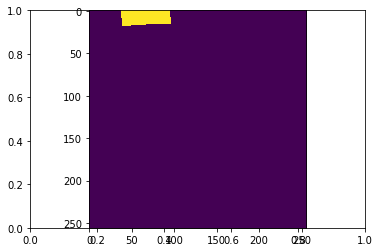

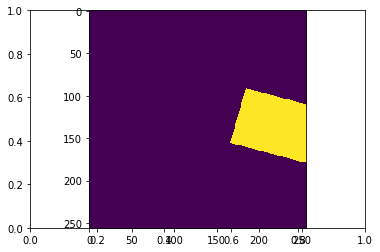

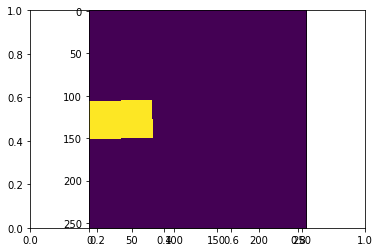

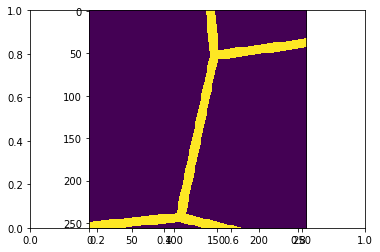

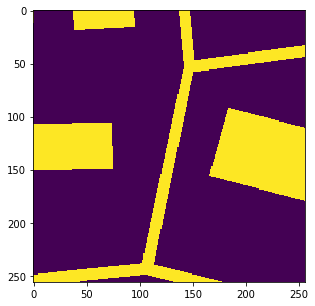

In [217]:
# image_id = random.choice(dataset.image_ids)
# image_id = 289
# image_id = 685  # single highway
# image_id = 745  # 1 highway & 1 building
image_id = 191

# for info in dataset.image_info:
# #     if info["path"].endswith("19_274590_340736.tiff"):  # tennis
#     if info["path"].endswith("19_274518_340739.tiff"):  # vineyard
#         image_id = info["id"]
#         break

print(image_id)
# info = dataset.get_info(image_id)
# print(info)

img, _ = dataset.load_mask(image_id)
full_mask = np.zeros((img.shape[0],img.shape[0],1), dtype=np.uint8)

# print(img)
for i in range(0, img.shape[2]):
    full_mask[np.where(img[:, :, i]>=1)] = 1
    fig, axs = plt.subplots()
    ax = fig.add_subplot(111)
    ax.imshow(img[:, :, i])
    
ax = get_ax(size=5)
ax.imshow(full_mask[:,:,0])

D:\training_images\_new\wettingen\19\19_274256_340895.tiff
image ID: osm.191 (191) 
Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  216.00000  uint8
Molding inputs
Inputs molded
molded_images            shape: (1, 256, 256, 3)      min:  -83.10000  max:  149.90000  float64
image_metas              shape: (1, 18)               min:    0.00000  max:  256.00000  int32
anchors                  shape: (1, 16368, 4)         min:   -1.41976  max:    2.16878  float32


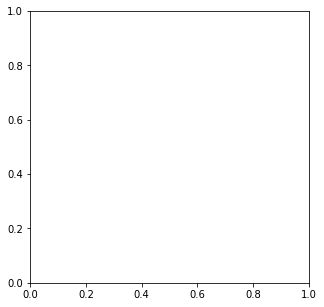

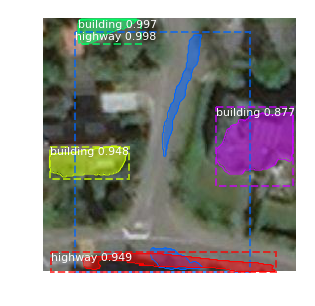

In [218]:

# image = dataset.load_image(image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask = modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print(info["path"])
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
# Run object detection
results = model.detect([image], [image_id], verbose=1)

colors = random_colors(1)

# Display results
ax = get_ax(1, size=5)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], figsize=(5,5))


# img = np.invert(plt.imread(info["path"][:-1]))


# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# Calculate IoU

In [151]:


print("Calculating IoU")
gt = np.array(full_mask, dtype=bool)

pred_masks = r['masks']
full_pred = np.zeros_like(gt, dtype=bool)
for i in range(0, pred_masks.shape[2]):
    full_pred[np.where(pred_masks[:, :, i]>=1)] = 1
    
# ax = get_ax(size=5)
# ax.imshow(full_pred[:,:,0])

overlap = gt * full_pred # Logical AND
union = gt + full_pred # Logical OR
IOU = overlap.sum()/float(union.sum())
print("IoU: ", IOU)

Calculating IoU
IoU:  0.08308952603861908


# Calculate Hit Rate

In [220]:
from core.mask_rcnn_config import osm_class_ids

def print_stat(tp, fp, fn):
    print("TP (correct predictions): ", tp)
    print("FP (wrong predictions):   ", fp)
    print("FN (missing predictions): ", fn)

    print("Precision:                ", tp / (tp + fp))
    print("Recall:                   ", tp / (tp + fn))

def compute_batch_hitrate(image_ids):
    all_results = []
    for image_id in image_ids:
        print(image_id)
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
                modellib.load_image_gt(dataset, config,
                                       image_id, use_mini_mask=False)
        results = model.detect([image], [image_id], verbose=0)
        r = results[0]
        
        predictions_by_class = {}
        class_by_id = {}
        for c in osm_class_ids:
            class_by_id[osm_class_ids[c]] = c

        pred_masks = r['masks']

        gt, gt_cls = dataset.load_mask(image_id)
        gt_updated = np.copy(gt)
        nr_instances = gt.shape[2]

        tp = 0
        fp = 0
        fn = 0
        for i_pred in range(0, pred_masks.shape[2]):
            cls_pred = r['class_ids'][i_pred]
            has_any_gt = False
            for i_gt in range(0, gt.shape[2]):
                if gt_cls[i_gt] == cls_pred:
                    match = gt[:, :, i_gt][np.where(pred_masks[:, :, i_pred] > 0)]
                    if match.max():
                        tp += 1
                        has_any_gt = True
            if not has_any_gt:
                fp += 1

        for i_gt in range(0, gt.shape[2]):
            has_any_pred = False
            for i_pred in range(0, pred_masks.shape[2]):
                cls_pred = r['class_ids'][i_pred]
                if gt_cls[i_gt] == cls_pred:
                    match = gt[:, :, i_gt][np.where(pred_masks[:, :, i_pred] > 0)]
                    if match.max():
                        has_any_pred = True
            if not has_any_pred:
                fn += 1
        all_results.append((tp, fp, fn))
        print("")
        print_stat(tp, fp, fn)
        print("")
    return all_results

nr_images = 5
image_ids = np.random.choice(dataset.image_ids, nr_images)
results = compute_batch_hitrate(image_ids)
tp_mean = sum(map(lambda r: r[0], results)) / nr_images
fp_mean = sum(map(lambda r: r[1], results)) / nr_images
fn_mean = sum(map(lambda r: r[2], results)) / nr_images

print("")
print("Summary")
print("--------------------------------------------------------")
print_stat(tp_mean, fp_mean, fn_mean)

26
Molding inputs
Inputs molded

TP (correct predictions):  7
FP (wrong predictions):    0
FN (missing predictions):  0
Precision:                 1.0
Recall:                    1.0

46
Molding inputs
Inputs molded

TP (correct predictions):  2
FP (wrong predictions):    1
FN (missing predictions):  4
Precision:                 0.6666666666666666
Recall:                    0.3333333333333333

765
Molding inputs
Inputs molded

TP (correct predictions):  6
FP (wrong predictions):    0
FN (missing predictions):  2
Precision:                 1.0
Recall:                    0.75

775
Molding inputs
Inputs molded

TP (correct predictions):  1
FP (wrong predictions):    2
FN (missing predictions):  1
Precision:                 0.3333333333333333
Recall:                    0.5

817
Molding inputs
Inputs molded

TP (correct predictions):  3
FP (wrong predictions):    1
FN (missing predictions):  2
Precision:                 0.75
Recall:                    0.6


Summary
--------------------------

In [ ]:
print(r["scores"])

In [ ]:
from mask_rcnn.visualize import random_colors

visualize.display_images([img], cmap='Greys', cols=1, figsize=5)
visualize.display_instances(np.zeros((256,256,3)), r['rois'], r['masks'], r['class_ids'], dataset.class_names, r['scores'], 
                            ax=None,
                            show_boxes=False, figsize=(5,5), colors=colors)

Nr. instances:  5

POLYGON ((214 141, 215 141, 216 141, 217 141, 218 141, 218 142, 219 142, 220 142, 220 143, 221 143, 222 143, 223 143, 224 143, 224 144, 225 144, 226 144, 226 145, 227 145, 228 145, 228 146, 229 146, 230 146, 230 147, 231 147, 232 147, 232 148, 233 148, 234 148, 234 149, 235 149, 236 149, 236 150, 237 150, 238 150, 238 151, 239 151, 239 152, 240 152, 241 152, 241 153, 242 153, 242 154, 243 154, 243 155, 244 155, 244 156, 245 156, 246 156, 246 157, 247 157, 247 158, 247 159, 248 159, 249 159, 249 160, 250 160, 250 161, 250 162, 250 163, 250 164, 250 165, 249 165, 249 166, 249 167, 249 168, 248 168, 248 169, 247 169, 247 170, 247 171, 246 171, 246 172, 245 172, 245 173, 245 174, 244 174, 244 175, 244 176, 243 176, 243 177, 242 177, 242 178, 242 179, 241 179, 241 180, 241 181, 240 181, 240 182, 240 183, 239 183, 239 184, 239 185, 239 186, 238 186, 238 187, 238 188, 237 188, 237 189, 237 190, 237 191, 236 191, 236 192, 235 192, 234 192, 234 193, 233 193, 232 193, 231 193,

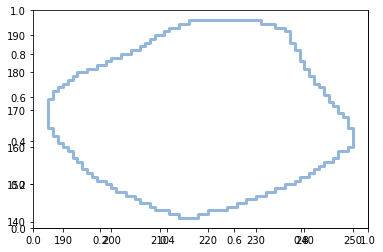

POLYGON ((4 86, 5 86, 6 86, 6 87, 7 87, 8 87, 9 87, 9 88, 10 88, 11 88, 12 88, 13 88, 13 89, 14 89, 14 90, 15 90, 15 91, 16 91, 16 92, 17 92, 17 93, 18 93, 19 93, 19 94, 20 94, 20 95, 21 95, 22 95, 22 96, 23 96, 24 96, 24 97, 25 97, 26 97, 27 97, 27 98, 28 98, 29 98, 30 98, 30 99, 31 99, 32 99, 33 99, 33 100, 34 100, 34 101, 35 101, 35 102, 35 103, 36 103, 36 104, 37 104, 37 105, 38 105, 39 105, 39 106, 40 106, 41 106, 41 107, 42 107, 42 108, 43 108, 44 108, 44 109, 45 109, 46 109, 46 110, 47 110, 48 110, 49 110, 49 111, 50 111, 51 111, 51 112, 52 112, 52 113, 53 113, 53 114, 54 114, 54 115, 55 115, 55 116, 56 116, 57 116, 57 117, 58 117, 59 117, 59 118, 60 118, 61 118, 61 119, 62 119, 62 120, 63 120, 64 120, 64 121, 65 121, 66 121, 66 122, 67 122, 68 122, 69 122, 69 123, 70 123, 70 124, 71 124, 71 125, 72 125, 72 126, 73 126, 74 126, 74 127, 75 127, 76 127, 76 128, 77 128, 78 128, 78 129, 79 129, 80 129, 80 130, 81 130, 81 131, 82 131, 82 132, 83 132, 84 132, 84 133, 85 133, 86 133, 8

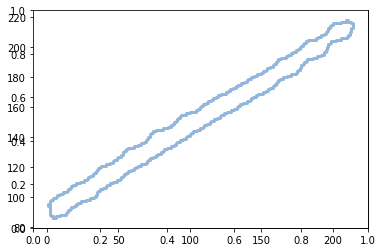

POLYGON ((102 215, 103 215, 104 215, 105 215, 106 215, 107 215, 108 215, 109 215, 110 215, 111 215, 111 216, 112 216, 113 216, 114 216, 114 217, 115 217, 116 217, 116 218, 117 218, 118 218, 118 219, 119 219, 120 219, 120 220, 121 220, 122 220, 122 221, 122 222, 123 222, 123 223, 124 223, 125 223, 125 224, 126 224, 126 225, 127 225, 128 225, 128 226, 129 226, 129 227, 130 227, 131 227, 132 227, 132 228, 133 228, 134 228, 135 228, 135 229, 136 229, 137 229, 137 230, 138 230, 139 230, 139 231, 140 231, 141 231, 142 231, 142 232, 143 232, 144 232, 145 232, 146 232, 146 233, 147 233, 147 234, 148 234, 149 234, 149 235, 150 235, 151 235, 152 235, 152 236, 152 237, 153 237, 153 238, 153 239, 154 239, 154 240, 154 241, 154 242, 154 243, 154 244, 154 245, 155 245, 155 246, 155 247, 155 248, 155 249, 155 250, 155 251, 155 252, 155 253, 154 253, 154 254, 154 255, 153 255, 152 255, 152 256, 151 256, 150 256, 149 256, 148 256, 147 256, 146 256, 145 256, 144 256, 143 256, 142 256, 141 256, 140 256, 

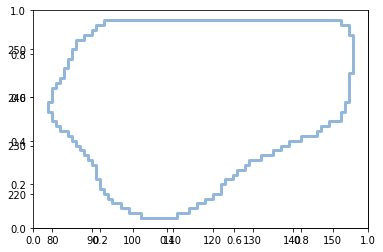

POLYGON ((254 75, 255 75, 256 75, 256 76, 256 77, 256 78, 256 79, 256 80, 256 81, 256 82, 256 83, 256 84, 256 85, 256 86, 256 87, 256 88, 256 89, 256 90, 256 91, 256 92, 256 93, 256 94, 256 95, 256 96, 256 97, 256 98, 256 99, 256 100, 256 101, 256 102, 256 103, 256 104, 256 105, 256 106, 256 107, 256 108, 256 109, 256 110, 256 111, 256 112, 256 113, 256 114, 256 115, 256 116, 255 116, 254 116, 254 115, 253 115, 253 114, 252 114, 251 114, 250 114, 249 114, 249 113, 248 113, 247 113, 247 112, 246 112, 246 111, 245 111, 245 110, 244 110, 243 110, 243 109, 242 109, 241 109, 241 108, 240 108, 239 108, 239 107, 238 107, 238 106, 237 106, 236 106, 236 105, 235 105, 234 105, 234 104, 233 104, 232 104, 232 103, 231 103, 231 102, 230 102, 230 101, 230 100, 230 99, 230 98, 231 98, 231 97, 231 96, 232 96, 232 95, 233 95, 233 94, 234 94, 234 93, 235 93, 235 92, 236 92, 236 91, 237 91, 237 90, 237 89, 238 89, 238 88, 239 88, 239 87, 240 87, 240 86, 241 86, 241 85, 242 85, 242 84, 243 84, 243 83, 243

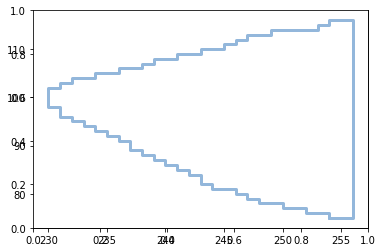

POLYGON ((22 1, 23 1, 24 1, 24 2, 25 2, 26 2, 27 2, 27 3, 28 3, 29 3, 30 3, 31 3, 32 3, 33 3, 33 4, 33 5, 33 6, 33 7, 33 8, 33 9, 33 10, 33 11, 33 12, 33 13, 32 13, 32 14, 31 14, 31 15, 31 16, 30 16, 30 17, 30 18, 29 18, 29 19, 28 19, 28 20, 28 21, 28 22, 27 22, 27 23, 28 23, 28 24, 29 24, 29 25, 28 25, 28 26, 28 27, 28 28, 28 29, 29 29, 29 30, 29 31, 30 31, 30 32, 30 33, 30 34, 31 34, 31 35, 31 36, 30 36, 30 37, 30 38, 30 39, 29 39, 28 39, 27 39, 27 40, 26 40, 25 40, 24 40, 23 40, 22 40, 21 40, 20 40, 20 39, 19 39, 18 39, 17 39, 17 38, 16 38, 15 38, 15 37, 15 36, 14 36, 14 35, 14 34, 15 34, 15 33, 14 33, 14 32, 13 32, 12 32, 12 33, 11 33, 10 33, 9 33, 9 34, 8 34, 8 35, 7 35, 7 34, 6 34, 6 33, 5 33, 4 33, 4 32, 3 32, 3 31, 3 30, 2 30, 1 30, 1 29, 0 29, 0 28, 0 27, 0 26, 0 25, 0 24, 0 23, 0 22, 0 21, 0 20, 0 19, 0 18, 0 17, 1 17, 1 16, 1 15, 1 14, 1 13, 1 12, 1 11, 1 10, 1 9, 1 8, 1 7, 2 7, 2 6, 2 5, 3 5, 3 6, 3 7, 4 7, 4 6, 5 6, 5 5, 6 5, 6 4, 6 3, 7 3, 8 3, 9 3, 10 3, 11 3, 12 3, 13 3

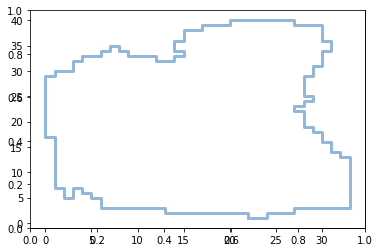

In [13]:
from core.utils import MarchingSquares
from shapely import geometry


# print(results[0]['masks'][:, :, 0])

# for m in results[0]['masks']:
#     print(m[:, :, 0])

nr_instances = results[0]['rois'].shape[0]
print("Nr. instances: ", nr_instances)

# ms = MarchingSquares.from_array(results[0]['masks'][:, :, 3])
# c = ms.find_contour(0.2)
# poly = geometry.Polygon([[x, y] for (x, y) in c])
# print(poly.wkt)

for i in range(nr_instances):
    print("")
    ms = MarchingSquares.from_array(results[0]['masks'][:, :, i])
    c = ms.find_contour()
    poly = geometry.Polygon([[x, y] for (x, y) in c])
    (x, y) = poly.exterior.xy
    plt.show()
    print(poly.wkt)
    fig, axs = plt.subplots()
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
#     break



### Precision-Recall

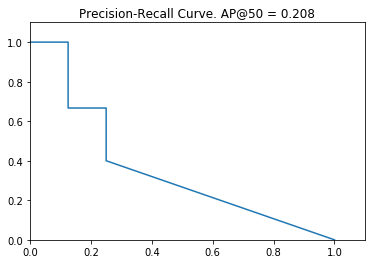

In [14]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                          r['rois'], r['class_ids'], r['scores'], r['masks'])
visualize.plot_precision_recall(AP, precisions, recalls)

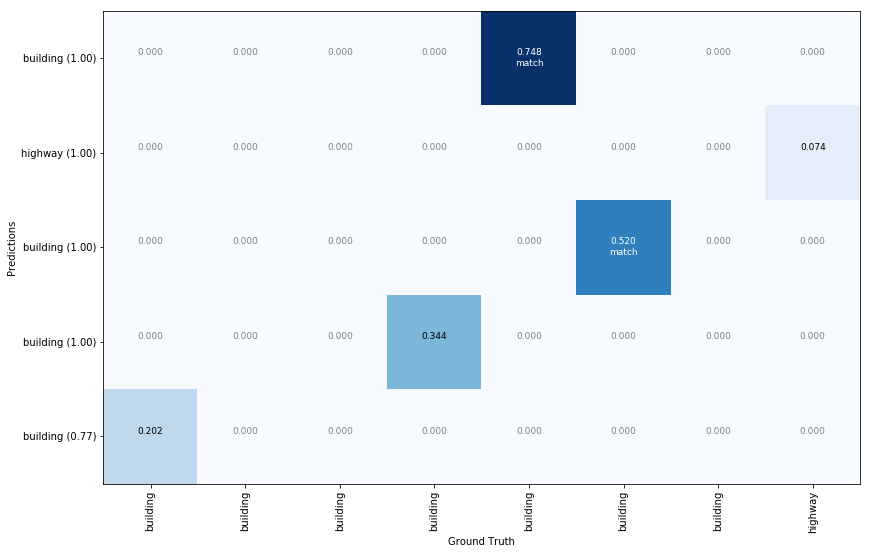

In [15]:
# Grid of ground truth objects and their predictions
visualize.plot_overlaps(gt_class_id, r['class_ids'], r['scores'],
                        overlaps, dataset.class_names)

### Compute mAP @ IoU=50 on Batch of Images

In [30]:
# Compute VOC-style Average Precision
def compute_batch_ap(image_ids):
    APs = []
    for image_id in image_ids:
        # Load image

            image, image_meta, gt_class_id, gt_bbox, gt_mask =\
                modellib.load_image_gt(dataset, config,
                                       image_id, use_mini_mask=False)
            image_info = list(filter(lambda i: i['id'] == image_id, dataset.image_info))[0]
            AP = "Failed!!!!"
            try:
                # Run object detection
                results = model.detect([image], [image_id], verbose=0)
                # Compute AP
                r = results[0]
                AP, precisions, recalls, overlaps =\
                    utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                                      r['rois'], r['class_ids'], r['scores'], r['masks'])
                APs.append(AP)
            except Exception as e:
                print(e)
            print(image_id, image_info['path'], AP)
        
    return APs

# Pick a set of random images
image_ids = np.random.choice(dataset.image_ids, 50)
APs = compute_batch_ap(image_ids)
print("mAP @ IoU=50: ", np.mean(APs))

Molding inputs
Inputs molded
294 D:\training_images\_new\wettingen\19\19_274248_340887.tiff 0.5
Molding inputs
Inputs molded
220 D:\training_images\_new\wettingen\19\19_274249_340882.tiff 0.125
Molding inputs
Inputs molded
590 D:\training_images\_new\wettingen\19\19_274257_340883.tiff 0.175
Molding inputs
Inputs molded
674 D:\training_images\_new\wettingen\19\19_274246_340881.tiff 0.0
Molding inputs
Inputs molded
493 D:\training_images\_new\wettingen\19\19_274247_340873.tiff 1.0
Molding inputs
Inputs molded
654 D:\training_images\_new\wettingen\19\19_274249_340897.tiff 0.0
Molding inputs
Inputs molded
213 D:\training_images\_new\wettingen\19\19_274248_340885.tiff 0.3333333432674408
Molding inputs
Inputs molded
685 D:\training_images\_new\wettingen\19\19_274254_340891.tiff 0.0
Molding inputs
Inputs molded
80 D:\training_images\_new\wettingen\19\19_274253_340878.tiff 0.0
Molding inputs
Inputs molded
535 D:\training_images\_new\wettingen\19\19_274251_340881.tiff 0.3645833333333333
Molding

## Step by Step Prediction

## Stage 1: Region Proposal Network

The Region Proposal Network (RPN) runs a lightweight binary classifier on a lot of boxes (anchors) over the image and returns object/no-object scores. Anchors with high *objectness* score (positive anchors) are passed to the stage two to be classified.

Often, even positive anchors don't cover objects fully. So the RPN also regresses a refinement (a delta in location and size) to be applied to the anchors to shift it and resize it a bit to the correct boundaries of the object.

### 1.a RPN Targets

The RPN targets are the training values for the RPN. To generate the targets, we start with a grid of anchors that cover the full image at different scales, and then we compute the IoU of the anchors with ground truth object. Positive anchors are those that have an IoU >= 0.7 with any ground truth object, and negative anchors are those that don't cover any object by more than 0.3 IoU. Anchors in between (i.e. cover an object by IoU >= 0.3 but < 0.7) are considered neutral and excluded from training.

To train the RPN regressor, we also compute the shift and resizing needed to make the anchor cover the ground truth object completely.

In [ ]:
# Generate RPN trainig targets
# target_rpn_match is 1 for positive anchors, -1 for negative anchors
# and 0 for neutral anchors.
target_rpn_match, target_rpn_bbox = modellib.build_rpn_targets(
    image.shape, model.anchors, gt_class_id, gt_bbox, model.config)
log("target_rpn_match", target_rpn_match)
log("target_rpn_bbox", target_rpn_bbox)

positive_anchor_ix = np.where(target_rpn_match[:] == 1)[0]
negative_anchor_ix = np.where(target_rpn_match[:] == -1)[0]
neutral_anchor_ix = np.where(target_rpn_match[:] == 0)[0]
positive_anchors = model.anchors[positive_anchor_ix]
negative_anchors = model.anchors[negative_anchor_ix]
neutral_anchors = model.anchors[neutral_anchor_ix]
log("positive_anchors", positive_anchors)
log("negative_anchors", negative_anchors)
log("neutral anchors", neutral_anchors)

# Apply refinement deltas to positive anchors
refined_anchors = utils.apply_box_deltas(
    positive_anchors,
    target_rpn_bbox[:positive_anchors.shape[0]] * model.config.RPN_BBOX_STD_DEV)
log("refined_anchors", refined_anchors, )


In [ ]:
# Display positive anchors before refinement (dotted) and
# after refinement (solid).
visualize.draw_boxes(image, boxes=positive_anchors, refined_boxes=refined_anchors, ax=get_ax())

### 1.b RPN Predictions

Here we run the RPN graph and display its predictions.

In [ ]:
# Run RPN sub-graph
pillar = model.keras_model.get_layer("ROI").output  # node to start searching from

# TF 1.4 introduces a new version of NMS. Search for both names to support TF 1.3 and 1.4
nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression:0")
if nms_node is None:
    nms_node = model.ancestor(pillar, "ROI/rpn_non_max_suppression/NonMaxSuppressionV2:0")

rpn = model.run_graph([image], [
    ("rpn_class", model.keras_model.get_layer("rpn_class").output),
    ("pre_nms_anchors", model.ancestor(pillar, "ROI/pre_nms_anchors:0")),
    ("refined_anchors", model.ancestor(pillar, "ROI/refined_anchors:0")),
    ("refined_anchors_clipped", model.ancestor(pillar, "ROI/refined_anchors_clipped:0")),
    ("post_nms_anchor_ix", nms_node),
    ("proposals", model.keras_model.get_layer("ROI").output),
])

In [ ]:
# Show top anchors by score (before refinement)
limit = 100
sorted_anchor_ids = np.argsort(rpn['rpn_class'][:,:,1].flatten())[::-1]
visualize.draw_boxes(image, boxes=model.anchors[sorted_anchor_ids[:limit]], ax=get_ax())

In [ ]:
# Show top anchors with refinment. Then with clipping to image boundaries
limit = 50
ax = get_ax(1, 2)
visualize.draw_boxes(image, boxes=rpn["pre_nms_anchors"][0, :limit], 
           refined_boxes=rpn["refined_anchors"][0, :limit], ax=ax[0])
visualize.draw_boxes(image, refined_boxes=rpn["refined_anchors_clipped"][0, :limit], ax=ax[1])

In [ ]:
# Show refined anchors after non-max suppression
limit = 50
ixs = rpn["post_nms_anchor_ix"][:limit]
visualize.draw_boxes(image, refined_boxes=rpn["refined_anchors_clipped"][0, ixs], ax=get_ax())

In [ ]:
# Show final proposals
# These are the same as the previous step (refined anchors 
# after NMS) but with coordinates normalized to [0, 1] range.
limit = 50
# Convert back to image coordinates for display
h, w = config.IMAGE_SHAPE[:2]
proposals = rpn['proposals'][0, :limit] * np.array([h, w, h, w])
visualize.draw_boxes(image, refined_boxes=proposals, ax=get_ax())

In [ ]:
# Measure the RPN recall (percent of objects covered by anchors)
# Here we measure recall for 3 different methods:
# - All anchors
# - All refined anchors
# - Refined anchors after NMS
iou_threshold = 0.7

recall, positive_anchor_ids = utils.compute_recall(model.anchors, gt_bbox, iou_threshold)
print("All Anchors ({:5})       Recall: {:.3f}  Positive anchors: {}".format(
    model.anchors.shape[0], recall, len(positive_anchor_ids)))

recall, positive_anchor_ids = utils.compute_recall(rpn['refined_anchors'][0], gt_bbox, iou_threshold)
print("Refined Anchors ({:5})   Recall: {:.3f}  Positive anchors: {}".format(
    rpn['refined_anchors'].shape[1], recall, len(positive_anchor_ids)))

recall, positive_anchor_ids = utils.compute_recall(proposals, gt_bbox, iou_threshold)
print("Post NMS Anchors ({:5})  Recall: {:.3f}  Positive anchors: {}".format(
    proposals.shape[0], recall, len(positive_anchor_ids)))


## Stage 2: Proposal Classification

This stage takes the region proposals from the RPN and classifies them.

### 2.a Proposal Classification

Run the classifier heads on proposals to generate class propbabilities and bounding box regressions.

In [ ]:
# Get input and output to classifier and mask heads.
mrcnn = model.run_graph([image], [
    ("proposals", model.keras_model.get_layer("ROI").output),
    ("probs", model.keras_model.get_layer("mrcnn_class").output),
    ("deltas", model.keras_model.get_layer("mrcnn_bbox").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
])

In [ ]:
# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]
detections = mrcnn['detections'][0, :det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

captions = ["{} {:.3f}".format(dataset.class_names[int(c)], s) if c > 0 else ""
            for c, s in zip(detections[:, 4], detections[:, 5])]
visualize.draw_boxes(
    image, 
    refined_boxes=detections[:, :4],
    visibilities=[2] * len(detections),
    captions=captions, title="Detections",
    ax=get_ax())

### 2.c Step by Step Detection

Here we dive deeper into the process of processing the detections.

In [ ]:
# Proposals are in normalized coordinates. Scale them
# to image coordinates.
h, w = config.IMAGE_SHAPE[:2]
proposals = np.around(mrcnn["proposals"][0] * np.array([h, w, h, w])).astype(np.int32)

# Class ID, score, and mask per proposal
roi_class_ids = np.argmax(mrcnn["probs"][0], axis=1)
roi_scores = mrcnn["probs"][0, np.arange(roi_class_ids.shape[0]), roi_class_ids]
roi_class_names = np.array(dataset.class_names)[roi_class_ids]
roi_positive_ixs = np.where(roi_class_ids > 0)[0]

# How many ROIs vs empty rows?
print("{} Valid proposals out of {}".format(np.sum(np.any(proposals, axis=1)), proposals.shape[0]))
print("{} Positive ROIs".format(len(roi_positive_ixs)))

# Class counts
print(list(zip(*np.unique(roi_class_names, return_counts=True))))

In [ ]:
# Display a random sample of proposals.
# Proposals classified as background are dotted, and
# the rest show their class and confidence score.
limit = 200
ixs = np.random.randint(0, proposals.shape[0], limit)
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[ixs], roi_scores[ixs])]
visualize.draw_boxes(image, boxes=proposals[ixs],
                     visibilities=np.where(roi_class_ids[ixs] > 0, 2, 1),
                     captions=captions, title="ROIs Before Refinment",
                     ax=get_ax())

#### Apply Bounding Box Refinement

In [ ]:
# Class-specific bounding box shifts.
roi_bbox_specific = mrcnn["deltas"][0, np.arange(proposals.shape[0]), roi_class_ids]
log("roi_bbox_specific", roi_bbox_specific)

# Apply bounding box transformations
# Shape: [N, (y1, x1, y2, x2)]
refined_proposals = utils.apply_box_deltas(
    proposals, roi_bbox_specific * config.BBOX_STD_DEV).astype(np.int32)
log("refined_proposals", refined_proposals)

# Show positive proposals
# ids = np.arange(roi_boxes.shape[0])  # Display all
limit = 5
ids = np.random.randint(0, len(roi_positive_ixs), limit)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[roi_positive_ixs][ids], roi_scores[roi_positive_ixs][ids])]
visualize.draw_boxes(image, boxes=proposals[roi_positive_ixs][ids],
                     refined_boxes=refined_proposals[roi_positive_ixs][ids],
                     visibilities=np.where(roi_class_ids[roi_positive_ixs][ids] > 0, 1, 0),
                     captions=captions, title="ROIs After Refinment",
                     ax=get_ax())

#### Filter Low Confidence Detections

In [ ]:
# Remove boxes classified as background
keep = np.where(roi_class_ids > 0)[0]
print("Keep {} detections:\n{}".format(keep.shape[0], keep))

In [ ]:
# Remove low confidence detections
keep = np.intersect1d(keep, np.where(roi_scores >= config.DETECTION_MIN_CONFIDENCE)[0])
print("Remove boxes below {} confidence. Keep {}:\n{}".format(
    config.DETECTION_MIN_CONFIDENCE, keep.shape[0], keep))

#### Per-Class Non-Max Suppression

In [ ]:
# Apply per-class non-max suppression
pre_nms_boxes = refined_proposals[keep]
pre_nms_scores = roi_scores[keep]
pre_nms_class_ids = roi_class_ids[keep]

nms_keep = []
for class_id in np.unique(pre_nms_class_ids):
    # Pick detections of this class
    ixs = np.where(pre_nms_class_ids == class_id)[0]
    # Apply NMS
    class_keep = utils.non_max_suppression(pre_nms_boxes[ixs], 
                                            pre_nms_scores[ixs],
                                            config.DETECTION_NMS_THRESHOLD)
    # Map indicies
    class_keep = keep[ixs[class_keep]]
    nms_keep = np.union1d(nms_keep, class_keep)
    print("{:22}: {} -> {}".format(dataset.class_names[class_id][:20], 
                                   keep[ixs], class_keep))

keep = np.intersect1d(keep, nms_keep).astype(np.int32)
print("\nKept after per-class NMS: {}\n{}".format(keep.shape[0], keep))

In [ ]:
# Show final detections
ixs = np.arange(len(keep))  # Display all
# ixs = np.random.randint(0, len(keep), 10)  # Display random sample
captions = ["{} {:.3f}".format(dataset.class_names[c], s) if c > 0 else ""
            for c, s in zip(roi_class_ids[keep][ixs], roi_scores[keep][ixs])]
visualize.draw_boxes(
    image, boxes=proposals[keep][ixs],
    refined_boxes=refined_proposals[keep][ixs],
    visibilities=np.where(roi_class_ids[keep][ixs] > 0, 1, 0),
    captions=captions, title="Detections after NMS",
    ax=get_ax())

## Stage 3: Generating Masks

This stage takes the detections (refined bounding boxes and class IDs) from the previous layer and runs the mask head to generate segmentation masks for every instance.

### 3.a Mask Targets

These are the training targets for the mask branch

In [ ]:
display_images(np.transpose(gt_mask, [2, 0, 1]), cmap="Blues")

### 3.b Predicted Masks

In [ ]:
# Get predictions of mask head
mrcnn = model.run_graph([image], [
    ("detections", model.keras_model.get_layer("mrcnn_detection").output),
    ("masks", model.keras_model.get_layer("mrcnn_mask").output),
])

# Get detection class IDs. Trim zero padding.
det_class_ids = mrcnn['detections'][0, :, 4].astype(np.int32)
det_count = np.where(det_class_ids == 0)[0][0]
det_class_ids = det_class_ids[:det_count]

print("{} detections: {}".format(
    det_count, np.array(dataset.class_names)[det_class_ids]))

In [ ]:
# Masks
det_boxes = mrcnn["detections"][0, :, :4].astype(np.int32)
det_mask_specific = np.array([mrcnn["masks"][0, i, :, :, c] 
                              for i, c in enumerate(det_class_ids)])
det_masks = np.array([utils.unmold_mask(m, det_boxes[i], image.shape)
                      for i, m in enumerate(det_mask_specific)])
log("det_mask_specific", det_mask_specific)
log("det_masks", det_masks)

In [ ]:
display_images(det_mask_specific[:1] * 255, cmap="Blues", interpolation="none")

In [ ]:
display_images(det_masks[:1] * 255, cmap="Blues", interpolation="none")

## Visualize Activations

In some cases it helps to look at the output from different layers and visualize them to catch issues and odd patterns.

In [ ]:
# Get activations of a few sample layers
activations = model.run_graph([image], [
    ("input_image",        model.keras_model.get_layer("input_image").output),
    ("res4w_out",          model.keras_model.get_layer("res4w_out").output),  # for resnet100
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

In [ ]:
# Input image (normalized)
_ = plt.imshow(modellib.unmold_image(activations["input_image"][0],config))

In [ ]:
# Backbone feature map
display_images(np.transpose(activations["res4w_out"][0,:,:,:4], [2, 0, 1]))

In [ ]:
# Histograms of RPN bounding box deltas
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title("dy")
_ = plt.hist(activations["rpn_bbox"][0,:,0], 50)
plt.subplot(1, 4, 2)
plt.title("dx")
_ = plt.hist(activations["rpn_bbox"][0,:,1], 50)
plt.subplot(1, 4, 3)
plt.title("dw")
_ = plt.hist(activations["rpn_bbox"][0,:,2], 50)
plt.subplot(1, 4, 4)
plt.title("dh")
_ = plt.hist(activations["rpn_bbox"][0,:,3], 50)

In [ ]:
# Distribution of y, x coordinates of generated proposals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("y1, x1")
plt.scatter(activations["roi"][0,:,0], activations["roi"][0,:,1])
plt.subplot(1, 2, 2)
plt.title("y2, x2")
plt.scatter(activations["roi"][0,:,2], activations["roi"][0,:,3])
plt.show()